<a href="https://colab.research.google.com/github/scholarmaverick1991/COVID-19/blob/master/Tax_Brackets_as_Social_Classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

Taxes are generally  not taught in the traditional education system

South Africa has a residence-based **income tax system** which has the effect that –

*   a resident’s worldwide taxable income is subject to income tax in South Africa; and
*   a non-resident’s taxable income from sources within South Africa is subject to tax in South Africa.

The South African government has entered into tax treaties with various countries, to prevent
the same income from being taxed in both countries. Should the same income be taxed in
both countries, a credit will generally be allowed in the country of residence for the tax paid in
the other country.

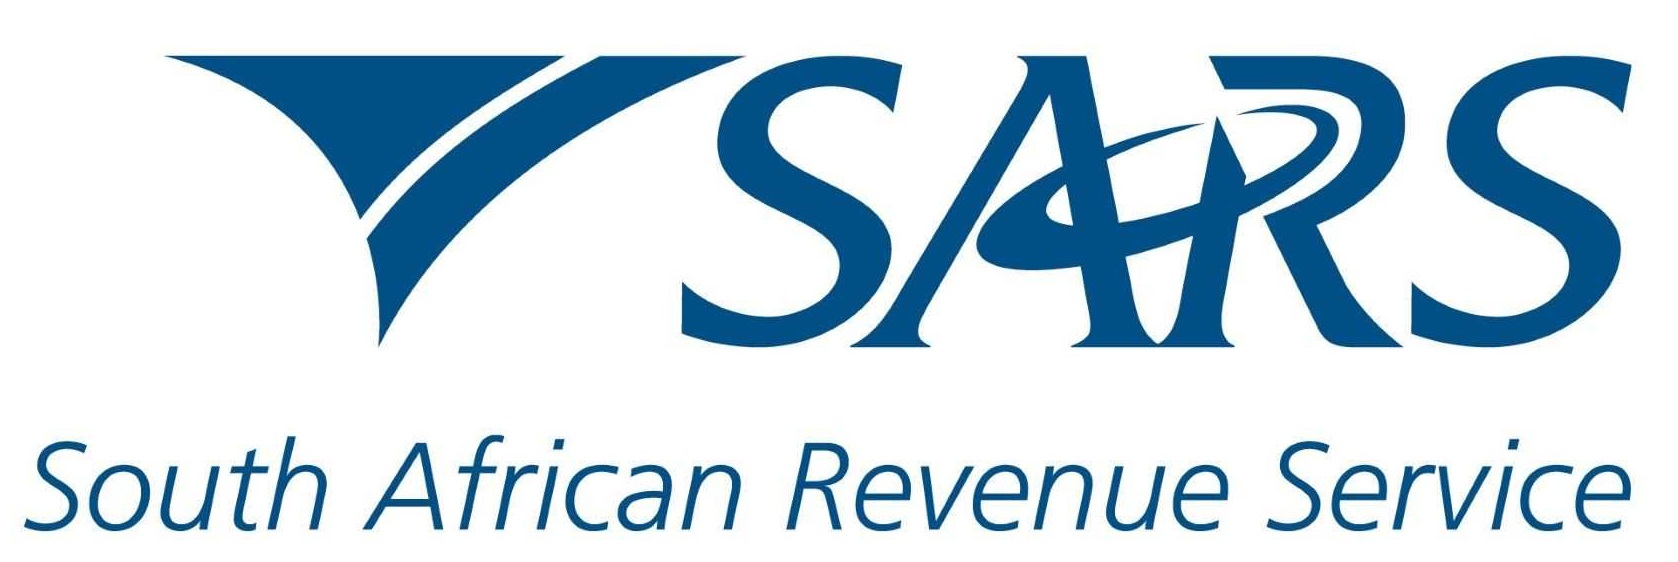​

Main source of government’s income

* Income tax is the government’s main source of income and is levied under the Act on the
taxable income of persons such as companies, trusts and natural persons, since 2001.



### ***Taxable income ​Rates South Africa***



---




**R1 – R226 000  |  18%** of taxable income



**R226 001 – R353 100	| R40 680 + 26%**of taxable income above **R216 200**

**R353 101 – R488 700	| R73 726 + 31%** of taxable income above **R337 800**

**R467 501 – R613 600 | R110 739 + 36%** of taxable income above **R467 500**

**R613 601 – R782 200| R163 335 + 39%** of taxable income above **R613 600**

**R782 201 – R1 656 600 |	R229 089  + 41%** of taxable income above **R782 200**

**R1 656 601 and above	R587 593 + 45%** of taxable income above **R1 656 600**



---



1. Using Tax Tim salary income calculator , amounts from **R50000 to R2025000** where using to calculate the Nett income of salaries in that range (one by one)

*   **https://www.taxtim.com/za/calculators/income-tax?mmi**

In [ ]:
import pandas as pd
import seaborn as sns
import altair as alt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_tax = pd.read_excel(r'/content/drive/MyDrive/Airport/Tax_Tim_Calculator.xlsx', usecols= ['Gross_PM', 'Nett_PM', 'Gross_PA', 'Nett_PA'] )
df_tax.keys()

Index(['Gross_PM', 'Nett_PM', 'Gross_PA', 'Nett_PA'], dtype='object')

In [ ]:
df_tax

,Gross_PM,Nett_PM,Gross_PA,Nett_PA
0,5000.0,4950.0,50000.0,49500.0
1,10000.0,9409.0,100000.0,96714.0
2,12500.0,11434.0,125000.0,116964.0
3,15000.0,13459.0,150000.0,137214.0
4,17500.0,15416.0,175000.0,157464.0
...,...,...,...,...
58,152500.0,98163.0,1525000.0,1004951.0
59,155000.0,99538.0,1550000.0,1019701.0
60,177500.0,111913.0,1775000.0,1147715.0
61,200000.0,124288.0,2000000.0,1271465.0


In [ ]:
#linear regression
from scipy.stats import linregress

#Annual salary correlation
x_pm =df_tax['Gross_PM']
y_pm  =df_tax['Nett_PM']
slope_pm , intercept_pm , r_value_pm , p_value_pm , std_err_pm  = linregress(x_pm , y_pm )

#Monthly salary correlation
x_yr =df_tax['Gross_PA']
y_yr =df_tax['Nett_PA']
slope_yr, intercept_yr, r_value_yr, p_value_yr, std_err_yr = linregress(x_yr, y_yr)



(0.6144986209291187, 0.9984997911498055)

In [ ]:
slope_yr,r_value_yr

(0.6144986209291187, 0.9984997911498055)

In [ ]:
slope_pm ,r_value_pm

(0.6039435249042145, 0.9990194882288)

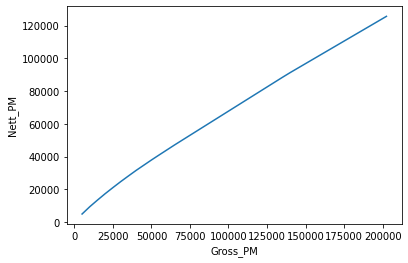

In [ ]:
sns.lineplot(data= df_tax,x=x,y=y)

2. Classifying the Salaries into SARS income bracket, these will form our social classes because these days your income determines your lifestyle based on affordability

In [ ]:
#Grouping the salaries into respective SARS income bracket

sars_18 = df_tax[df_tax['Gross_PA']<216200]
sars_26 = df_tax[(df_tax['Gross_PA']>216200) & (df_tax['Gross_PA']<337800)]
sars_31 = df_tax[(df_tax['Gross_PA']>337800) & (df_tax['Gross_PA']<467500)]
sars_36 = df_tax[(df_tax['Gross_PA']>467500) & (df_tax['Gross_PA']<613600)]
sars_39 = df_tax[(df_tax['Gross_PA']>613600) & (df_tax['Gross_PA']<782200)]
sars_41 = df_tax[(df_tax['Gross_PA']>782200) & (df_tax['Gross_PA']<1656600)]
sars_45 = df_tax[df_tax['Gross_PA']>1656600]

#Defining tax Bracket

sars_18["Tax_Class"] = 'Grp_18%'
sars_26["Tax_Class"] = 'Grp_26%'
sars_31["Tax_Class"] = 'Grp_31%'
sars_36["Tax_Class"] = 'Grp_36%'
sars_39["Tax_Class"] = 'Grp_39%'
sars_41["Tax_Class"] = 'Grp_41%'
sars_45["Tax_Class"] = 'Grp_45%'




Tagged_salaries.groupby("Tax_Class").count()

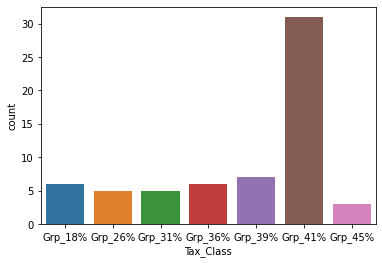

In [ ]:
sns.countplot(x='Tax_Class',
              data = Tagged_salaries)

**Observation :**


---


Ideally speaking the majority of the employed individuals must fall into the **36% to 41% tax groups**.



---



## **Salary Reviews**

---



Using Salaries from variaus recruitment  and career guidance sites, i.e. [careerjunction](https://www.careerjunction.co.za/),  we going to impose the same tax classification method as above to the job market is actually distributed.

In [ ]:
df_sal =pd.read_excel(r'/content/drive/MyDrive/Test_ENV folder/salaries_za.xlsx',usecols= ['Min', 'Max', 'Job_Title', 'Industry_Sector', 'Level',
       'Source'])
df_sal["Averge_pay"] = ((df_sal['Min'] + df_sal['Max'])/2)*12

In [ ]:
df_sal

,Min,Max,Job_Title,Industry_Sector,Level,Source,Averge_pay
0,18000,22000,Web Designer,Admin Office & Support,Intermediate,educonnect.com,240000.0
1,24000,34000,Web Designer,Admin Office & Support,Senior,educonnect.com,348000.0
2,11000,13000,Warehouse Operations,Admin Office & Support,Intermediate,educonnect.com,144000.0
3,15000,20000,Warehouse Operations,Admin Office & Support,Senior,educonnect.com,210000.0
4,3000,5000,Waiter,Hospitality,Intermediate,educonnect.com,48000.0
...,...,...,...,...,...,...,...
353,13639,18611,Merchandiser Product Promoter & Demonstrator,Sales,Senior,careerjunction.com,193500.0
354,11953,14338,Sales Administration,Sales,Senior,careerjunction.com,157746.0
355,15067,19083,Wholesale,Sales,Senior,careerjunction.com,204900.0
356,31095,40336,Trade Broking,Sales,Senior,careerjunction.com,428586.0


Grouping the Job titles according to the income Tax Brackets defined by SARS

In [ ]:
#Grouping

RSA_Tax_18 = df_sal[df_sal['Averge_pay']<216200]
RSA_Tax_26 = df_sal[(df_sal['Averge_pay']>216200) & (df_sal['Averge_pay']<337800)]
RSA_Tax_31 = df_sal[(df_sal['Averge_pay']>337800) & (df_sal['Averge_pay']<467500)]
RSA_Tax_36 = df_sal[(df_sal['Averge_pay']>467500) & (df_sal['Averge_pay']<613600)]
RSA_Tax_39 = df_sal[(df_sal['Averge_pay']>613600) & (df_sal['Averge_pay']<782200)]
RSA_Tax_41 = df_sal[(df_sal['Averge_pay']>782200) & (df_sal['Averge_pay']<1656600)]
RSA_Tax_45 = df_sal[df_sal['Averge_pay']>1656600]

#Defining tax brackets

RSA_Tax_18["Tax_Class"] = 'Grp_18%'
RSA_Tax_26["Tax_Class"] = 'Grp_26%'
RSA_Tax_31["Tax_Class"] = 'Grp_31%'
RSA_Tax_36["Tax_Class"] = 'Grp_36%'
RSA_Tax_39["Tax_Class"] = 'Grp_39%'
RSA_Tax_41["Tax_Class"] = 'Grp_41%'
RSA_Tax_45["Tax_Class"] = 'Grp_45%'

#fusing the the defined back to one frame

all_sal = [RSA_Tax_18,
           RSA_Tax_26,
           RSA_Tax_31,
           RSA_Tax_36,
           RSA_Tax_39,
           RSA_Tax_41,
           RSA_Tax_45]

salaries = pd.concat(all_sal)

#mean values by tax brackets
salaries.groupby("Tax_Class").mean()

In [ ]:
sns.countplot(x='Tax_Class',
              data = salaries)

Never Give up on something you Think about everyday without fail

Cost of of living between the **Johannesburg, Durban and Cape town** , in this section i atempted to cluster this